In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir9am     132180 non-null  object 
 8   WindDir3pm     138415 non-null  object 
 9   WindSpeed9am   140845 non-null  float64
 10  WindSpeed3pm   139563 non-null  float64
 11  Humidity9am    140419 non-null  float64
 12  Humidity3pm    138583 non-null  float64
 13  Pressure9am    128179 non-null  float64
 14  Pressure3pm    128212 non-null  float64
 15  Cloud9am       88536 non-null   float64
 16  Cloud3pm       85099 non-null   float64
 17  Temp9am        141289 non-nul

데이터의 요약값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수 중 NA값이 있는 행을 제거하시오. 그리고 AUS 데이터의 Date 변수를 Date형으로 변환하고, 전처리가 완료된 weather AUS 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(6789)를 실행한 후 데이터를 분할하시오.)

In [3]:
data.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [4]:
data.drop(columns=['WindDir9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   WindGustDir    132863 non-null  object 
 6   WindGustSpeed  132923 non-null  float64
 7   WindDir3pm     138415 non-null  object 
 8   WindSpeed9am   140845 non-null  float64
 9   WindSpeed3pm   139563 non-null  float64
 10  Humidity9am    140419 non-null  float64
 11  Humidity3pm    138583 non-null  float64
 12  Temp9am        141289 non-null  float64
 13  Temp3pm        139467 non-null  float64
 14  RainToday      140787 non-null  object 
 15  RainTomorrow   142193 non-null  object 
dtypes: float64(10), object(6)
memory usage: 17.4+ MB


In [5]:
data.dropna(inplace=True)
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128576 entries, 0 to 142192
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           128576 non-null  datetime64[ns]
 1   Location       128576 non-null  object        
 2   MinTemp        128576 non-null  float64       
 3   MaxTemp        128576 non-null  float64       
 4   Rainfall       128576 non-null  float64       
 5   WindGustDir    128576 non-null  object        
 6   WindGustSpeed  128576 non-null  float64       
 7   WindDir3pm     128576 non-null  object        
 8   WindSpeed9am   128576 non-null  float64       
 9   WindSpeed3pm   128576 non-null  float64       
 10  Humidity9am    128576 non-null  float64       
 11  Humidity3pm    128576 non-null  float64       
 12  Temp9am        128576 non-null  float64       
 13  Temp3pm        128576 non-null  float64       
 14  RainToday      128576 non-null  object        
 15  

In [7]:
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No


In [8]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['RainTomorrow', 'Date'])
y=data[['RainTomorrow']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128576 entries, 0 to 142192
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       128576 non-null  object 
 1   MinTemp        128576 non-null  float64
 2   MaxTemp        128576 non-null  float64
 3   Rainfall       128576 non-null  float64
 4   WindGustDir    128576 non-null  object 
 5   WindGustSpeed  128576 non-null  float64
 6   WindDir3pm     128576 non-null  object 
 7   WindSpeed9am   128576 non-null  float64
 8   WindSpeed3pm   128576 non-null  float64
 9   Humidity9am    128576 non-null  float64
 10  Humidity3pm    128576 non-null  float64
 11  Temp9am        128576 non-null  float64
 12  Temp3pm        128576 non-null  float64
 13  RainToday      128576 non-null  object 
dtypes: float64(10), object(4)
memory usage: 14.7+ MB


In [9]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=6789)
X_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
9200,CoffsHarbour,16.0,34.5,0.0,SW,44.0,NE,19.0,30.0,30.0,52.0,28.7,26.2,No
139668,Katherine,18.3,37.1,0.0,ESE,39.0,SE,7.0,20.0,50.0,22.0,27.5,36.4,No
69991,Mildura,15.7,28.4,0.0,WNW,41.0,WNW,15.0,24.0,51.0,34.0,19.6,27.9,No
59475,Bendigo,7.8,15.5,6.2,W,83.0,W,24.0,33.0,94.0,62.0,9.4,13.2,Yes
31748,Sydney,7.4,20.2,0.0,W,37.0,SSE,28.0,13.0,67.0,36.0,9.6,19.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53866,Ballarat,-1.6,8.7,0.4,WSW,22.0,W,0.0,11.0,99.0,72.0,4.0,7.2,No
48541,Tuggeranong,20.2,32.7,15.8,NNW,52.0,WNW,4.0,15.0,80.0,49.0,23.5,32.3,Yes
87951,GoldCoast,21.2,29.1,0.0,ESE,50.0,SE,28.0,35.0,67.0,68.0,26.8,26.2,No
113237,PearceRAAF,10.7,33.4,0.0,ESE,59.0,SE,31.0,17.0,49.0,26.0,24.5,31.8,No


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90003 entries, 9200 to 120620
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       90003 non-null  object 
 1   MinTemp        90003 non-null  float64
 2   MaxTemp        90003 non-null  float64
 3   Rainfall       90003 non-null  float64
 4   WindGustDir    90003 non-null  object 
 5   WindGustSpeed  90003 non-null  float64
 6   WindDir3pm     90003 non-null  object 
 7   WindSpeed9am   90003 non-null  float64
 8   WindSpeed3pm   90003 non-null  float64
 9   Humidity9am    90003 non-null  float64
 10  Humidity3pm    90003 non-null  float64
 11  Temp9am        90003 non-null  float64
 12  Temp3pm        90003 non-null  float64
 13  RainToday      90003 non-null  object 
dtypes: float64(10), object(4)
memory usage: 10.3+ MB


- 라벨 인코딩

In [11]:
from sklearn.preprocessing import LabelEncoder

features = ['Location','WindGustDir','WindDir3pm', 'RainToday']

for feature in features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

C:\Users\taeeu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\taeeu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import time
log=LogisticRegression(random_state=0)

start=time.time()
log.fit(X_train, y_train)
end=time.time()

pred=log.predict(X_test)
print("로지스틱")
print(round(end-start, 5))
print(accuracy_score(pred, y_test))

로지스틱
2.37579
0.8351956031420942


In [21]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=0)

start=time.time()
xgb.fit(X_train, y_train)
end=time.time()

pred=xgb.predict(X_test)
print("XGB")
print(round(end-start, 5))
print(accuracy_score(pred, y_test))

[00:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
10.58187
0.8575169159774972


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)

start=time.time()
rf.fit(X_train, y_train)
end=time.time()

pred=rf.predict(X_test)
print("RandomForest")
print(round(end-start, 5))
print(accuracy_score(pred, y_test))

RandomForest
33.7694
0.8544318564799211


0.6900418584168296


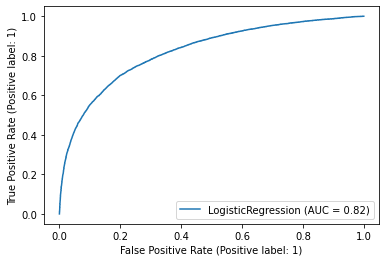

In [26]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
log_pred=log.predict(X_test)
print(roc_auc_score(y_test, log_pred))
plot_roc_curve(log, X_test, y_test)
plt.show()

0.7389130361828442


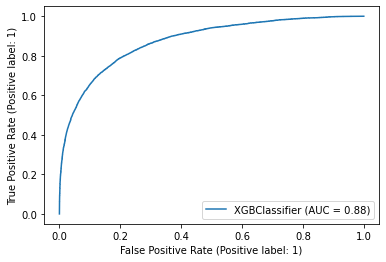

In [27]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
xgb_pred=xgb.predict(X_test)
print(roc_auc_score(y_test, xgb_pred))
plot_roc_curve(xgb, X_test, y_test)
plt.show()

0.7217728036005552


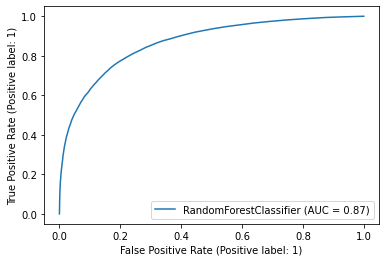

In [28]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
rf_pred=rf.predict(X_test)
print(roc_auc_score(y_test, rf_pred))
plot_roc_curve(rf, X_test, y_test)
plt.show()